In [80]:
import numpy as np
import pandas as pd
import torch
from torch import nn
import matplotlib.pyplot as plt
import tqdm

In [2]:
# Set the number of rows
num_rows = 10  # You can change this to the desired number of rows

# # Generate random natural numbers between 1 and 10 for each column
# A = np.random.randint(1, 11, size=num_rows)
# B = np.random.randint(1, 11, size=num_rows)
# C = np.random.randint(1, 11, size=num_rows)
A = np.array([10, 11, 8, 3, 2, 1])
B = np.array([6, 4, 5, 3, 2.8, 1])
# C = np.array([])

# Print the generated numbers
print("Generated numbers for column A:", A)
print("Generated numbers for column B:", B)
# print("Generated numbers for column C:", C)


Generated numbers for column A: [10 11  8  3  2  1]
Generated numbers for column B: [6.  4.  5.  3.  2.8 1. ]


In [3]:
A_mean = np.mean(A)
B_mean = np.mean(B)

(-12.0, 12.0)

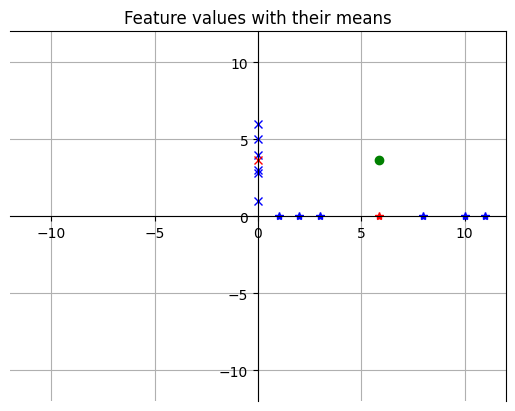

In [4]:
# plotting current data values
# red points are the mean values of each feature (column)
# green point is the coordinate formed by the mean values of each feature

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')


# plotting feature 1 on x axis
plt.plot(A, [0 for _ in range(A.shape[0])], 'b*')

# plotting feature 2 on y axis
plt.plot([0 for _ in range(B.shape[0])], B, 'bx')

# plotting their means
plt.title('Feature values with their means')
plt.plot(A_mean, 0, 'r*')
plt.plot(B_mean, 'rx')
plt.plot(A_mean, B_mean, 'go')
plt.grid()
plt.xlim(-12, 12)
plt.ylim(-12, 12)

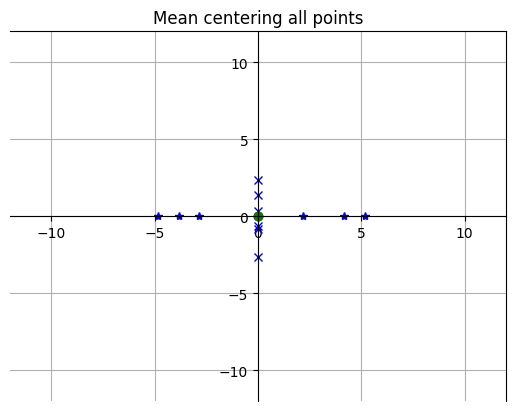

In [5]:
# plotting current data values
# mean centering current data values

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

plt.title('Mean centering all points')
plt.plot(A - A_mean, [0 for _ in range(A.shape[0])], 'b*')
plt.plot([0 for _ in range(B.shape[0])], B - B_mean, 'bx')
plt.plot(A_mean - A_mean, 0, 'ro')
plt.plot(B_mean - B_mean, 'ro')
plt.plot(A_mean - A_mean, B_mean - B_mean , 'go')
plt.xlim(-12, 12)
plt.ylim(-12, 12)
plt.grid()

In [6]:
# write an equation of a line that goes througuh origin 
import random
# m = random.uniform(0, 2 * np.pi)
m = 0.0
print(f'Initial slope is {m}')
x = np.arange(-10, 10, 1)
y = m * x + 0

Initial slope is 0.0


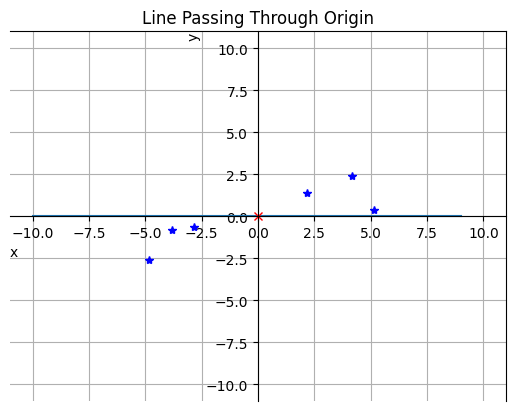

In [7]:
# plotting the points with the randomly generated line
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')


plot_lim = 11

plt.plot(x, y)
plt.xlabel('x', loc='left')
plt.ylabel('y', loc='top')
plt.title('Line Passing Through Origin')
plt.grid(True)


# plt.plot(A - A_mean, [0 for _ in range(10)], 'bo')
# plt.plot([0 for _ in range(10)], B - B_mean, 'bx')
# plt.plot(A_mean - A_mean, 0, 'ro')
# plt.plot(B_mean - B_mean, 'ro')
plt.plot(A-A_mean, B - B_mean, 'b*')
plt.plot(A_mean - A_mean, B_mean - B_mean , 'rx')
plt.xlim(-plot_lim, plot_lim)
plt.ylim(-plot_lim, plot_lim)
plt.show()

In [8]:
mean_centered_x = A - A_mean
mean_centered_y = B - B_mean

In [9]:
m_tensor = torch.tensor(m, requires_grad=True)

In [10]:
# lf = 0

In [11]:
A_tensors = []
B_tensors = []

In [12]:
A_tensors = []
B_tensors = []
for a_val, b_val in zip(mean_centered_x, mean_centered_y):
    A_tensors.append(torch.tensor(a_val))
    B_tensors.append(torch.tensor(b_val))

In [83]:
# optimizing slope of line by minimising distances between the points and the line




# METHOD 1 TO OPTIMISE BEST FIT LINE : MINIMIZE SQUARED DISTANCES BETWEEN DATA POINTS AND LINE
# ************************************************************************************************************************************ #
# epochs = 10
# for i in range(epochs):
#     for a, b in zip(A_tensors, B_tensors):
#         lf += ((b / m_tensor) - a) ** 2
#     # print(lf)
#     m_tensor.retain_grad()
#     lf.backward(retain_graph=True)
#     m_tensor = m_tensor - 3e-4 * m_tensor.grad
# ************************************************************************************************************************************ #


# METHOD 2 TO OPTIMISE BEST FIT LINE : MAXIMISE SQUARED DISTANCES OF DATA POINT PROJECTIONS ON LINE TO FIND PRINCIPAL COMPONENT WITH MAXIMUM
# DATA POINT VARIANCE (in which the data points are the most far apart)
maximize_equation = 0
epochs = 300

slopes = []
for i in tqdm.tqdm(range(epochs), desc="Training"):
    # print(f'EPOCH {i + 1}')
    slopes.append(m_tensor.detach().numpy())
    for a_val, b_val in zip(A_tensors, B_tensors):
    
        # calculating distance of data point from origin
        point_dist_from_origin = torch.sqrt(B_tensors[0] ** 2 + A_tensors[0] ** 2)
        # projecting this distance vector onto the best fit principal component
        point_proj_dist = point_dist_from_origin * torch.cos(m_tensor - (b_val / a_val) )
        maximize_equation += point_proj_dist ** 2
    
    
    m_tensor.retain_grad()
    maximize_equation.backward(retain_graph=True)
    m_tensor = m_tensor + 3e-4 * m_tensor.grad
        
    

Training: 100%|████████████████████████████████████████████████| 300/300 [00:02<00:00, 108.45it/s]


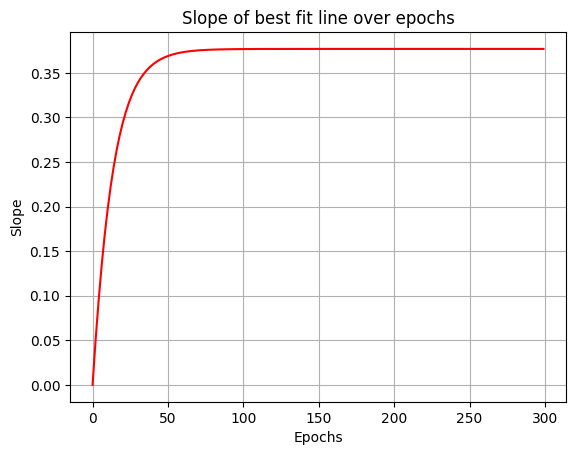

In [14]:
# plotting the approximation of slope over the number of epochs
# converging slope at the end of all epochs is the slope of the best fit line

plt.xlabel('Epochs')
plt.ylabel('Slope')
plt.grid()
plt.title('Slope of best fit line over epochs')
plt.plot(slopes, 'r')

In [15]:
print(f'Optimum slope of principal component is', m_tensor.detach().numpy())

Optimum slope of principal component is 0.37678638


In [16]:
# calculating new line after minimizing distance (by optimizing m)
y_tensor = m_tensor * torch.tensor(x)

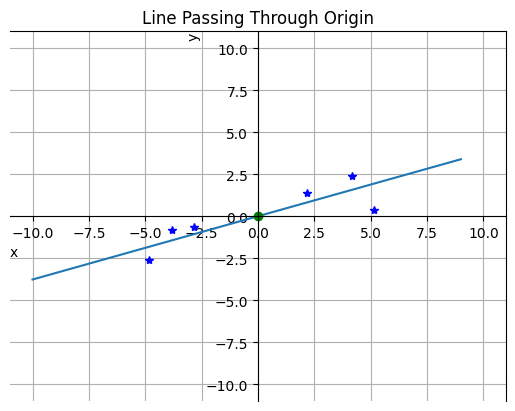

In [17]:
# plotting new best-fit line

# plotting the points with the randomly generated line
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')


plot_lim = 11

plt.plot(x, y_tensor.detach().numpy())
plt.xlabel('x', loc='left')
plt.ylabel('y', loc='top')
plt.title('Line Passing Through Origin')
plt.grid(True)

plt.plot(A-A_mean, B - B_mean, 'b*')
plt.plot(A_mean - A_mean, B_mean - B_mean , 'go')
plt.xlim(-plot_lim, plot_lim)
plt.ylim(-plot_lim, plot_lim)
plt.show()

In [81]:
# METHOD 1 : FIND PROJECTED POINT ON PRINCIPAL COMPONENT USING TRIGNOMETRY


# def find_projected_point(line_slope, point):
#     gamma = torch.sqrt(point[0] ** 2 + point[1] ** 2)
#     point_slope = point[1] / point[0]

#     if point_slope > 0:
#         phi = m_tensor - point_slope
#     else:
#         phi = point_slope - m_tensor
#     q = gamma * torch.cos(phi) * torch.sin(m_tensor)
#     p = q / line_slope
#     # print(p.detach().numpy(), q.detach().numpy())

#     return np.array([p.detach().numpy(), q.detach().numpy()])

# METHOD 2 : FIND PROJECTED POINT ON PRINCIPAL COMPONENT USING SLOPE INTERCEPT FORM

def find_intersection_point(m1, x0, y0):
    # Calculate slope of perpendicular line
    m1_perpendicular = -1 / m1
    
    # Calculate y-intercept of perpendicular line
    c1_perpendicular = y0 - m1_perpendicular * x0
    
    # Calculate x-coordinate of intersection
    x = (c1_perpendicular - 0) / (m1 - m1_perpendicular)
    
    # Calculate y-coordinate using the equation of line 1 (y = mx)
    y = m1 * x
    
    return x.detach().numpy(), y.detach().numpy()

In [19]:
def find_projected_points(line_slope, A_tensors, B_tensors):

    projected_points = []
    for a_val, b_val in zip(A_tensors, B_tensors):
        projected_points.append(find_intersection_point(line_slope, a_val, b_val))
    
    
    projected_points = np.array(projected_points)

    return projected_points

In [20]:
projected_points = find_projected_points(m_tensor, A_tensors, B_tensors)

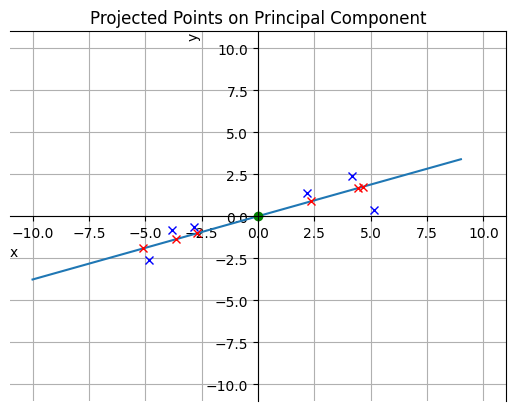

In [21]:
# plotting projected points
# red crosses are projected points on the principal component
# blue crosses are the original points

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')


plot_lim = 11

plt.plot(x, y_tensor.detach().numpy())
plt.xlabel('x', loc='left')
plt.ylabel('y', loc='top')
plt.title('Projected Points on Principal Component')
plt.grid(True)

plt.plot(A-A_mean, B - B_mean, 'bx')
plt.plot(A_mean - A_mean, B_mean - B_mean , 'go')
plt.xlim(-plot_lim, plot_lim)
plt.ylim(-plot_lim, plot_lim)
plt.plot(projected_points[:, 0], projected_points[:, 1], 'rx')
plt.show()

In [22]:
# this is essentially the eigenvalue of the principal component
# points : projected points after projecting on principal component
def find_sum_squared_distances_from_origin(points):
    ss_distances = 0
    for x, y in points:
        # print(x, y)
        dist_from_origin = (x - 0) ** 2 + (y - 0) ** 2
        ss_distances += dist_from_origin ** 2

    return ss_distances / (points.shape[0] -1 )

In [23]:
# def get_points(A_tensors, B_tensors):

#     points = []
#     for a_val, b_val in zip(A_tensors, B_tensors):
#         points.append([a_val.detach().numpy(), b_val.detach().numpy()])

#     return np.array(points)

In [24]:
# points = get_points(A_tensors, B_tensors)

In [25]:
projected_points = find_projected_points(m_tensor, A_tensors, B_tensors)

In [58]:
# eigenvalue of PC1
print(f'Eigenvalue for PC1 is {find_sum_squared_distances_from_origin(projected_points)}')

Eigenvalue for PC1 is 465.45295985530447


In [55]:
def get_loading_scores(line_slope): # input -> slope of pc1 of type torch.tensor ; output -> np.array of loading scores

    line_slope = line_slope.detach().numpy()
    
    alpha = 1
    beta = alpha / np.tan(line_slope)
    
    ls1 = alpha / np.sqrt(alpha ** 2 + beta ** 2)
    ls2 = beta / np.sqrt(alpha ** 2 + beta ** 2)

    return np.array([ls1, ls2])

In [57]:
# getting loading scores for principal component 1
print(f'Loading scores for principal component PC1 are {get_loading_scores(m_tensor)}')

Loading scores for principal component PC1 are [0.36793418 0.92985184]


In [79]:
print(f'Equation for Principal Component 1 -> y = {np.round(float(m_tensor.detach().numpy()), 2)}x')

Equation for Principal Component 1 -> y = 0.38x
